# Working with Images

Most of the times, when people think of working with images, **photoshop** is what comes to mind. In this notebook we will learn how to using **Python for image manipulation** using PIL library.

The **Python Imaging Library** adds image processing capabilities to your Python interpreter.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import image
import seaborn as sns

## Loading Images with Matplotlib

<class 'numpy.ndarray'> (4320, 7680, 3)


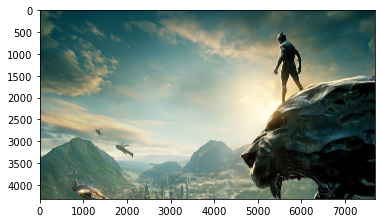

In [2]:
img = image.imread('images/bp.jpg')

print(type(img), img.shape)

plt.imshow(img)

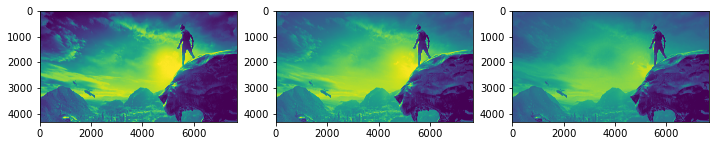

In [3]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.imshow(img[:,:,0])

plt.subplot(1, 3, 2)
plt.imshow(img[:,:,1])

plt.subplot(1, 3, 3)
plt.imshow(img[:,:,2])

## Loading Images with PIL

In [4]:
from PIL import Image

img = Image.open('images/bp.jpg')

print(type(img))

img.show() # Opens in new window

<class 'PIL.JpegImagePlugin.JpegImageFile'>


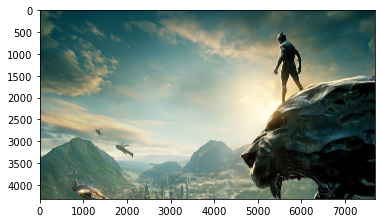

In [5]:
plt.imshow(img)

In [6]:
# display(img)

In [7]:
print(img.size) # (width, Height in pixels)

print(img.filename)

print(img.format)

print(img.mode)

(7680, 4320)
images/bp.jpg
JPEG
RGB


## Images as arrays of data

What is an image? So far, PIL has handled loading images and displaying them. However, if we're going to use images as data, we need to understand what that data looks like.  
Most image formats have three color "channels": red, green, and blue (some images also have a fourth channel called "alpha" that controls transparency). For each pixel in an image, there is a value for every channel.

The way this is represented as data is as a three-dimensional matrix. The width of the matrix is the width of the image, the height of the matrix is the height of the image, and the depth of the matrix is the number of channels. So, as we saw, the height and width of our image are both 100 pixels. This means that the underlying data is a matrix with the dimensions `100x100x3`.

In [8]:
# Turn our image object into a NumPy array
img_arr = np.array(img)

print(type(img_arr), img_arr.shape)

<class 'numpy.ndarray'> (4320, 7680, 3)


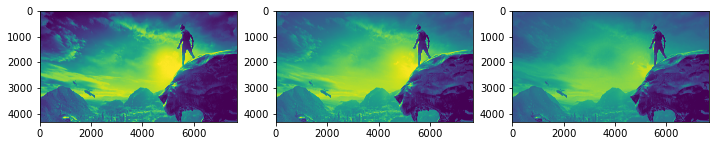

In [9]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.imshow(img_arr[:,:,0])

plt.subplot(1, 3, 2)
plt.imshow(img_arr[:,:,1])

plt.subplot(1, 3, 3)
plt.imshow(img_arr[:,:,2])

In [10]:
img.split()

(<PIL.Image.Image image mode=L size=7680x4320 at 0x28F1FE72A00>,
 <PIL.Image.Image image mode=L size=7680x4320 at 0x28F1FE72B50>,
 <PIL.Image.Image image mode=L size=7680x4320 at 0x28F1FE72910>)

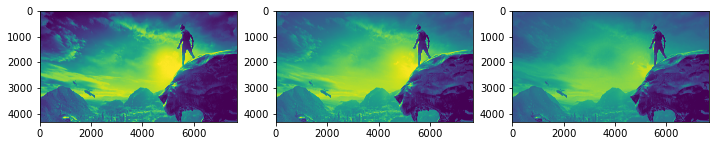

In [11]:
red, green, blue = img.split()

plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.imshow(red)

plt.subplot(1, 3, 2)
plt.imshow(green)

plt.subplot(1, 3, 3)
plt.imshow(blue)

## Image manipulation with PIL

Pillow has a number of common image manipulation tasks built into the library. For example, one may want to resize an image so that the file size is smaller. Or, perhaps, convert an image to black-and-white instead of color. Operations that Pillow provides include:

- rotating
- flipping
- cropping
- resizing


Often, these kinds of manipulations are part of the pipeline for turning a small number of images into more images to create training data for machine learning algorithms. This technique is called `data augmentation`, and it is a common technique for image classification.  
We'll try a couple of these operations and look at the results.

### Rotating

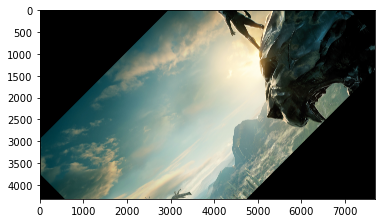

In [12]:
from PIL import Image

img = Image.open('images/bp.jpg')

# rotate the image by 45 degrees
img_rotated = img.rotate(45)
plt.imshow(img_rotated)

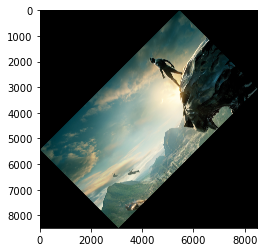

In [13]:
# rotate the image by 45 degrees and expand=True
img_rotated = img.rotate(45, expand=True)
plt.imshow(img_rotated)

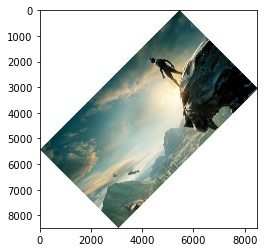

In [14]:
# rotate the image by 45 degrees with fillcolor
img_rotated = img.rotate(45, expand=True, fillcolor=(255,255,255))
plt.imshow(img_rotated)

### Cropping

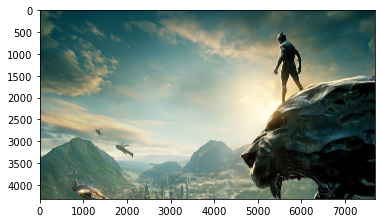

In [15]:
from PIL import Image

img = Image.open('images/bp.jpg')

plt.imshow(img)

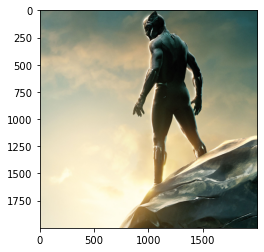

In [16]:
# Crop the image to 25, 25, 75, 75 - Left_x, top_y, right_x, bottom_y
img_cropped = img.crop((4500, 500, 6500, 2500))
plt.imshow(img_cropped)

### Flipping

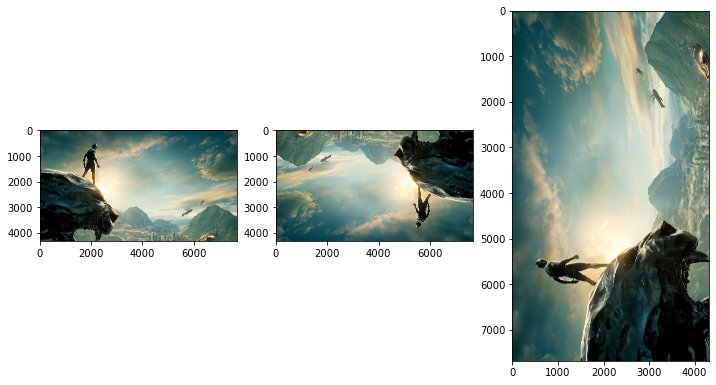

In [17]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
# flip the image left to right
img_flipped_horizontal = img.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(img_flipped_horizontal)

plt.subplot(1, 3, 2)
# flip the image left to right
img_flipped_vertical = img.transpose(Image.FLIP_TOP_BOTTOM)
plt.imshow(img_flipped_vertical)

plt.subplot(1, 3, 3)
# flip the image left to right
img_flipped = img.transpose(Image.TRANSPOSE)
plt.imshow(img_flipped)

### Resizing

In [18]:
new_img = img.resize((200, 200))
new_img.save('images/transformed/bp_200.jpg')

print(img.size) # Output: (7680, 4320)
print(new_img.size) # Output: (200, 200)

(7680, 4320)
(200, 200)


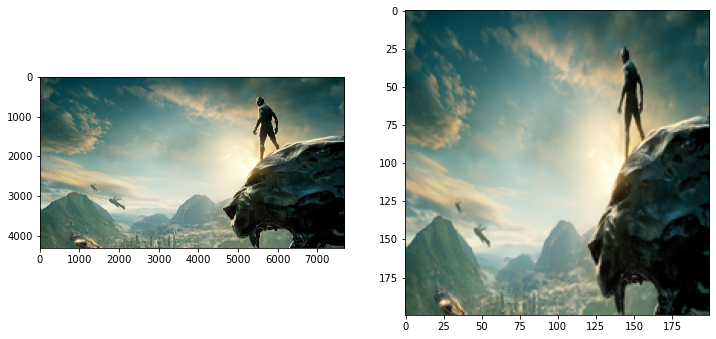

In [19]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(new_img)

(200, 113)


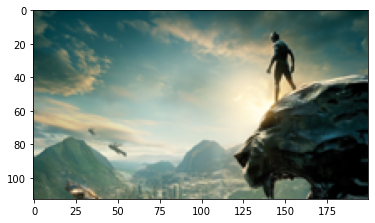

In [20]:
# thumbnail take cares of the aspect ratio

img.thumbnail((200, 200))
img.save('images/transformed/bp_thumbnail.jpg')

print(img.size)

plt.imshow(img)

## Image Enhancement

PIL can change the vibrance, contrast, brightness and sharpness using ImageEnhance.

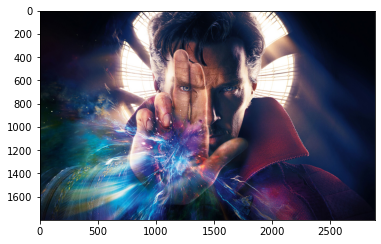

In [21]:
img = Image.open('images/ds.jpg')

plt.imshow(img)

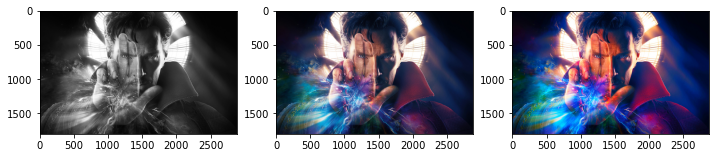

In [22]:
from PIL import ImageEnhance

plt.figure(figsize=(12, 8))

# vibrance enhancer - use 0, 1, 1.5, 2, etc
color_enhancer = ImageEnhance.Color(img)

plt.subplot(1, 3, 1)
plt.imshow(color_enhancer.enhance(0))

plt.subplot(1, 3, 2)
plt.imshow(color_enhancer.enhance(1))

plt.subplot(1, 3, 3)
plt.imshow(color_enhancer.enhance(2))

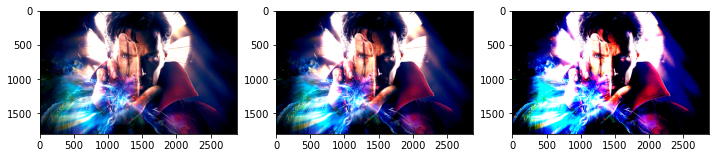

In [23]:
from PIL import ImageEnhance

plt.figure(figsize=(12, 8))

contrast_enhancer = ImageEnhance.Contrast(img)

plt.subplot(1, 3, 1)
plt.imshow(contrast_enhancer.enhance(1.5))

plt.subplot(1, 3, 2)
plt.imshow(contrast_enhancer.enhance(2))

plt.subplot(1, 3, 3)
plt.imshow(contrast_enhancer.enhance(5))

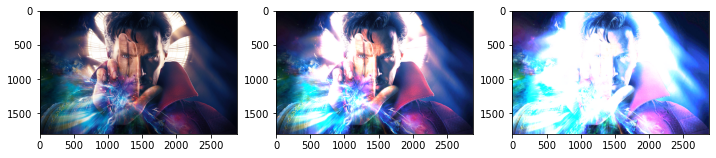

In [24]:
from PIL import ImageEnhance

plt.figure(figsize=(12, 8))

brightness_enhancer = ImageEnhance.Brightness(img)

plt.subplot(1, 3, 1)
plt.imshow(brightness_enhancer.enhance(1))

plt.subplot(1, 3, 2)
plt.imshow(brightness_enhancer.enhance(2))

plt.subplot(1, 3, 3)
plt.imshow(brightness_enhancer.enhance(5))

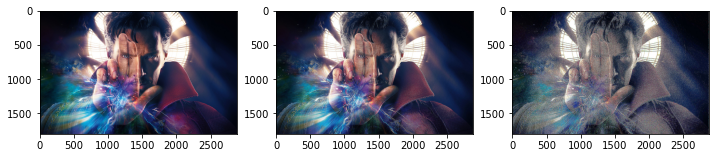

In [25]:
from PIL import ImageEnhance

plt.figure(figsize=(12, 8))

sharpness_enhancer = ImageEnhance.Sharpness(img)

plt.subplot(1, 3, 1)
plt.imshow(sharpness_enhancer.enhance(2))

plt.subplot(1, 3, 2)
plt.imshow(sharpness_enhancer.enhance(20))

plt.subplot(1, 3, 3)
plt.imshow(sharpness_enhancer.enhance(100))

## Filters

PIL can also do blur, contour, emboss, sharpening, smooth, etc using ImageFilter.

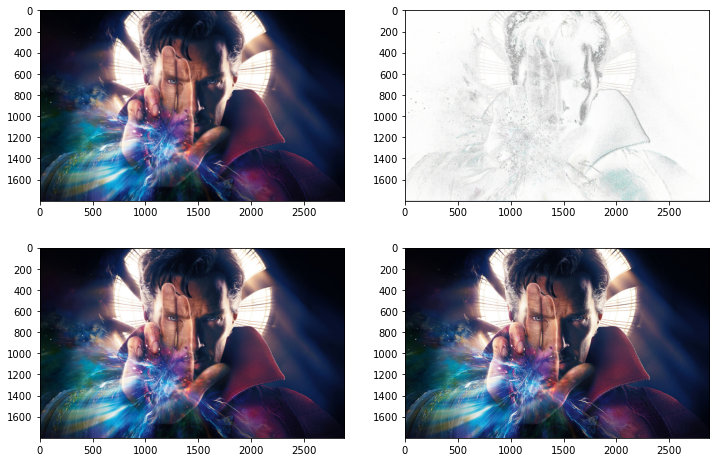

In [26]:
from PIL import ImageFilter

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img.filter(ImageFilter.BLUR))

plt.subplot(2, 2, 2)
plt.imshow(img.filter(ImageFilter.CONTOUR))

plt.subplot(2, 2, 3)
plt.imshow(img.filter(ImageFilter.SMOOTH))

plt.subplot(2, 2, 4)
plt.imshow(img.filter(ImageFilter.EDGE_ENHANCE))

## Putting Text on the Image

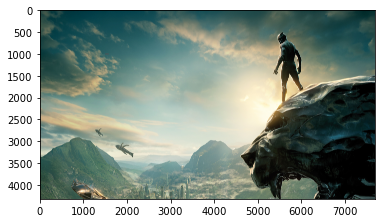

In [28]:
from PIL import Image
from PIL import ImageDraw

# Open the image
img = Image.open("images/bp.jpg")

# Call Draw method to add 2D graphics on the image
DRAW = ImageDraw.Draw(img)

# Add text to the image
DRAW.text((1500, 1000), text="Black Panther", fill=(255, 0, 0))

# Display the image
plt.imshow(img)
# img.show()

# Save the image
img.save("images/transformed/bp_text_1.jpg")

**Checkout below mentioned resources for font type and color**  
Font - https://fonts.google.com/  
Color - https://g.co/kgs/hMV71G

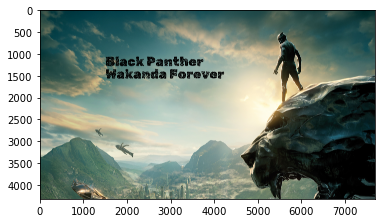

In [29]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

# Open the image
img = Image.open("images/bp.jpg")

# Call Draw method to add 2D graphics on the image
DRAW = ImageDraw.Draw(img)

# Customize font type and font style
CUST_FONT = ImageFont.truetype('Font/RubikDistressed-Regular.ttf', 300)

TEXT = """Black Panther
Wakanda Forever"""

# Add text to the image
DRAW.text((1500, 1000), text=TEXT, fill=(0, 0, 0), font=CUST_FONT)

# Display the image
plt.imshow(img)
# img.show()

# Save the image
img.save("images/transformed/bp_text_2.jpg")

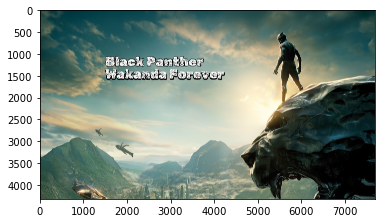

In [30]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

# Open the image
img = Image.open("images/bp.jpg")

# Call Draw method to add 2D graphics on the image
DRAW = ImageDraw.Draw(img)

# Customize font type and font style
CUST_FONT = ImageFont.truetype('Font/RubikDistressed-Regular.ttf', 300)

TEXT = """Black Panther
Wakanda Forever"""

# Add text to the image
DRAW.text((1500, 1000), text=TEXT, fill=(0, 0, 0), font=CUST_FONT, stroke_width=10)
DRAW.text((1500, 1000), text=TEXT, fill=(255, 255, 255), font=CUST_FONT)

# Display the image
plt.imshow(img)
# img.show()

# Save the image
img.save("images/transformed/bp_text_3.jpg")

## Flatten multichannel image

In [32]:
img = Image.open('images/bp.jpg')

img_arr = np.array(img)

print(type(img_arr), img_arr.shape)

<class 'numpy.ndarray'> (4320, 7680, 3)


In [33]:
img_arr

array([[[31, 66, 62],
        [32, 67, 63],
        [33, 68, 64],
        ...,
        [ 5, 47, 46],
        [ 3, 45, 44],
        [ 1, 43, 42]],

       [[35, 70, 66],
        [35, 70, 66],
        [36, 71, 67],
        ...,
        [ 5, 47, 46],
        [ 4, 46, 45],
        [ 3, 45, 44]],

       [[38, 73, 69],
        [38, 73, 69],
        [38, 73, 69],
        ...,
        [ 4, 46, 45],
        [ 4, 46, 45],
        [ 3, 45, 44]],

       ...,

       [[54, 77, 61],
        [53, 76, 60],
        [54, 77, 61],
        ...,
        [52, 72, 73],
        [53, 73, 74],
        [51, 71, 72]],

       [[54, 77, 61],
        [53, 76, 60],
        [54, 77, 61],
        ...,
        [51, 71, 72],
        [53, 73, 74],
        [52, 72, 73]],

       [[54, 77, 61],
        [53, 76, 60],
        [54, 77, 61],
        ...,
        [51, 71, 72],
        [53, 73, 74],
        [52, 72, 73]]], dtype=uint8)

In [34]:
img_arr.ravel()

array([31, 66, 62, ..., 52, 72, 73], dtype=uint8)

In [35]:
flat_img = img_arr.ravel()

print(flat_img.shape)

(99532800,)


## Image Preprocessing

Some image preprocessing techniques are mentioned below:

1. Gray scale conversion
2. Normalisation
3. Data Augmentation - Rotating, Changing Brightness, Flipping, etc..

There are many more Preprocessing steps for images. You will learn them later.

In [36]:
img_arr.shape

(4320, 7680, 3)

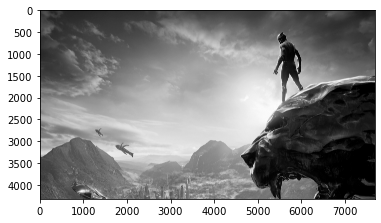

In [37]:
plt.imshow(img.convert("1"))

In [38]:
gray_img = img.convert("1")

gray_img_arr = np.array(gray_img)

print(gray_img_arr.shape)

print(gray_img_arr.ravel().shape)

(4320, 7680)
(33177600,)
